In [10]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
from adjustText import adjust_text
import matplotlib.pylab as plt

In [11]:
data = pd.read_csv("data_adj/fixed_counts_matrix.tsv", sep="\t")
#here is where we filter out what samples we want to use
#i started using the old skeletal muscle heehee
data = data.filter(items=['gene_id',
                'LB_10.5_NA_1', 'LB_10.5_NA_2','LB_11.5_NA_1', 'LB_11.5_NA_2',
                #'G_4_F_1', 'G_4_F_2','G_4_M_1', 'G_4_M_2',
                'SM_0_NA_1', 'SM_0_NA_2','SM_0_NA_old_1', 'SM_0_NA_old_2',
                'MB_3', 'MB_4','MB_5',
                'MT_3', 'MT_4', 'MT_5'])
data = data.set_index(data["gene_id"])
data = data.drop('gene_id', axis=1)

In [12]:
data.head()

,LB_10.5_NA_1,LB_10.5_NA_2,LB_11.5_NA_1,LB_11.5_NA_2,SM_0_NA_1,SM_0_NA_2,SM_0_NA_old_1,SM_0_NA_old_2,MB_3,MB_4,MB_5,MT_3,MT_4,MT_5
gene_id,,,,,,,,,,,,,,
ENSMUSG00000099183.1,0,0,0,0,1,4,14,10,0,0,1,6,2,4
ENSMUSG00000065559.1,96,350,1561,1909,298316,447669,852425,1305418,27143,24389,27329,1074677,1300194,1256891
ENSMUSG00000065480.1,4,25,92,83,2556,4440,6690,8902,334,359,1088,26475,26033,21244
ENSMUSG00000065405.3,18023,20008,13458,15665,17696,20188,45908,32248,125913,135138,120392,27729,28878,25335
ENSMUSG00000065567.1,125,57,111,71,51,87,135,197,2074,1710,2018,517,529,416


In [13]:
metadata = pd.read_csv("data_adj/metadata.tsv", sep="\t",
                      usecols=["File.accession", "Biosample.term.name", "Age", "Sample"])

In [14]:
# Filter metadata DataFrame based on matching samples in merged_df
metadata_filtered = metadata[metadata['Sample'].isin(data.columns)].copy()

# Sort filtered_metadata based on the order of columns in merged_df
metadata_filtered['Sample'] = pd.Categorical(metadata_filtered['Sample'], categories=data.columns)
metadata_filtered.sort_values('Sample', inplace=True)

In [15]:
filtering = {'Biosample.term.name': ['myotube', 'skeletal muscle tissue'],#whatever you need from the biosample names
             'Age': ["PND_0","72"]}
group = 'Biosample.term.name' # change to the group you're interested in making the comparison in

In [16]:
metadata_selected = metadata_filtered.copy(deep=True)

In [17]:
for col in filtering.keys():
    metadata_selected = metadata_selected[metadata_selected[col].isin(filtering[col])]

In [18]:
metadata_selected

,File.accession,Biosample.term.name,Age,Sample
47,ENCFF431VHL,skeletal muscle tissue,PND_0,SM_0_NA_1
49,ENCFF430EME,skeletal muscle tissue,PND_0,SM_0_NA_2
48,ENCFF629KYY,skeletal muscle tissue,PND_0,SM_0_NA_old_1
50,ENCFF007FOL,skeletal muscle tissue,PND_0,SM_0_NA_old_2
54,Ctrl_72hr_A_new,myotube,72,MT_3
55,Ctrl_72hr_B_new,myotube,72,MT_4
56,Ctrl_72hr_C_new,myotube,72,MT_5


In [19]:
metadata_selected.index = metadata_selected['Sample']
data_selected = data.loc[:, metadata_selected['Sample']]

In [20]:
data_selected

,SM_0_NA_1,SM_0_NA_2,SM_0_NA_old_1,SM_0_NA_old_2,MT_3,MT_4,MT_5
gene_id,,,,,,,
ENSMUSG00000099183.1,1,4,14,10,6,2,4
ENSMUSG00000065559.1,298316,447669,852425,1305418,1074677,1300194,1256891
ENSMUSG00000065480.1,2556,4440,6690,8902,26475,26033,21244
ENSMUSG00000065405.3,17696,20188,45908,32248,27729,28878,25335
ENSMUSG00000065567.1,51,87,135,197,517,529,416
...,...,...,...,...,...,...,...
ENSMUSG00000099172.1,0,0,0,1,0,0,0
ENSMUSG00000093219.1,0,1,0,0,1,0,3
ENSMUSG00000065602.1,5658,5973,16588,16073,588,804,702


In [21]:
metadata_selected

,File.accession,Biosample.term.name,Age,Sample
Sample,,,,
SM_0_NA_1,ENCFF431VHL,skeletal muscle tissue,PND_0,SM_0_NA_1
SM_0_NA_2,ENCFF430EME,skeletal muscle tissue,PND_0,SM_0_NA_2
SM_0_NA_old_1,ENCFF629KYY,skeletal muscle tissue,PND_0,SM_0_NA_old_1
SM_0_NA_old_2,ENCFF007FOL,skeletal muscle tissue,PND_0,SM_0_NA_old_2
MT_3,Ctrl_72hr_A_new,myotube,72,MT_3
MT_4,Ctrl_72hr_B_new,myotube,72,MT_4
MT_5,Ctrl_72hr_C_new,myotube,72,MT_5


In [22]:
dds = DeseqDataSet(
    counts=data_selected.T,
    clinical=metadata_selected,
    design_factors=group,
    refit_cooks=True)

dds.deseq2()
stat_res = DeseqStats(dds, 
                      contrast=[group] + filtering[group])
stat_res.summary()

Fitting size factors...
... done in 0.00 seconds.



/opt/apps/python/3.8.0/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Fitting dispersions...
... done in 6.20 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 4.27 seconds.

Fitting LFCs...
... done in 1.61 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 1.01 seconds.

Log2 fold change & Wald test p-value: Biosample.term.name myotube vs skeletal muscle tissue


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSMUSG00000099183.1,4.957189,-0.495016,0.787526,-0.628571,5.296300e-01,5.884190e-01
ENSMUSG00000065559.1,872200.312500,1.065634,0.217508,4.899296,9.618080e-07,2.366353e-06
ENSMUSG00000065480.1,13601.194336,2.388526,0.158948,15.027060,4.881937e-51,4.961969e-50
ENSMUSG00000065405.3,26733.427734,0.127549,0.205586,0.620415,5.349844e-01,5.923042e-01
ENSMUSG00000065567.1,271.334747,2.319621,0.161263,14.384047,6.516923e-47,5.772131e-46
...,...,...,...,...,...,...
ENSMUSG00000099172.1,0.085163,-0.588529,4.206401,-0.139913,8.887289e-01,NaN
ENSMUSG00000093219.1,0.777924,2.292577,2.231547,1.027348,3.042564e-01,NaN
ENSMUSG00000065602.1,5599.338867,-3.694908,0.206119,-17.926112,7.376070e-72,9.730135e-71


In [23]:
l2fc_cutoff = 2 # Log 2 fold change; usually 0.5 - 2
pval_cutoff = 0.05 # 0.01 is even better than 0.05

In [24]:
annot = pd.read_csv("data_adj/mirna_id_to_name.tsv", sep="\t")
annot.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
annot.head()

,gene_id,gene_name
0,ENSMUSG00000065559.1,Mir206
1,ENSMUSG00000065480.1,Mir133b
2,ENSMUSG00000065567.1,Mir30c-2
3,ENSMUSG00000105982.1,Mir6896
4,ENSMUSG00000092852.1,Mir5103


In [26]:
df = stat_res.results_df.copy(deep=True)

In [27]:
# Find the machine-specific lowest non-zero value
lowest_nonzero_value = df['padj'][df['padj'] > 0].min()

# Replace 0 with the lowest non-zero value
df['padj'] = np.where(df['padj'] == 0, lowest_nonzero_value, df['padj'])

df = df.dropna()
df = df.merge(annot, left_index=True, right_on='gene_id')
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_name
0,872200.312500,1.065634,0.217508,4.899296,9.618080e-07,2.366353e-06,ENSMUSG00000065559.1,Mir206
1,13601.194336,2.388526,0.158948,15.027060,4.881937e-51,4.961969e-50,ENSMUSG00000065480.1,Mir133b
818,26733.427734,0.127549,0.205586,0.620415,5.349844e-01,5.923042e-01,ENSMUSG00000065405.3,Mir30a
2,271.334747,2.319621,0.161263,14.384047,6.516923e-47,5.772131e-46,ENSMUSG00000065567.1,Mir30c-2
3,4.152003,0.918768,0.779086,1.179289,2.382830e-01,2.885458e-01,ENSMUSG00000105982.1,Mir6896
...,...,...,...,...,...,...,...,...
805,20702.447266,-0.772931,0.071243,-10.849247,2.010749e-27,1.210354e-26,ENSMUSG00000076011.1,Mir652
809,2.753752,-4.726743,2.115850,-2.233968,2.548515e-02,3.739271e-02,ENSMUSG00000093122.1,Mir1264
810,8.841332,-6.376568,2.230251,-2.859126,4.248099e-03,7.176625e-03,ENSMUSG00000080331.1,Mir1298
814,5599.338867,-3.694908,0.206119,-17.926112,7.376070e-72,9.730135e-71,ENSMUSG00000065602.1,Mirlet7f-2


In [28]:
# Calculate -log10(padj)
df['nlog10padj'] = -np.log10(df['padj'])

# Add labels to DE column based on our cutoffs above
df['DE'] = "No"
df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange > l2fc_cutoff)] = "Up"
df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange < -l2fc_cutoff)] = "Down"

/tmp/ipykernel_2188008/1959988433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange > l2fc_cutoff)] = "Up"
/tmp/ipykernel_2188008/1959988433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange < -l2fc_cutoff)] = "Down"


In [29]:
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_name,nlog10padj,DE
0,872200.312500,1.065634,0.217508,4.899296,9.618080e-07,2.366353e-06,ENSMUSG00000065559.1,Mir206,5.625920,No
1,13601.194336,2.388526,0.158948,15.027060,4.881937e-51,4.961969e-50,ENSMUSG00000065480.1,Mir133b,49.304346,Up
818,26733.427734,0.127549,0.205586,0.620415,5.349844e-01,5.923042e-01,ENSMUSG00000065405.3,Mir30a,0.227455,No
2,271.334747,2.319621,0.161263,14.384047,6.516923e-47,5.772131e-46,ENSMUSG00000065567.1,Mir30c-2,45.238664,Up
3,4.152003,0.918768,0.779086,1.179289,2.382830e-01,2.885458e-01,ENSMUSG00000105982.1,Mir6896,0.539785,No
...,...,...,...,...,...,...,...,...,...,...
805,20702.447266,-0.772931,0.071243,-10.849247,2.010749e-27,1.210354e-26,ENSMUSG00000076011.1,Mir652,25.917088,No
809,2.753752,-4.726743,2.115850,-2.233968,2.548515e-02,3.739271e-02,ENSMUSG00000093122.1,Mir1264,1.427213,Down
810,8.841332,-6.376568,2.230251,-2.859126,4.248099e-03,7.176625e-03,ENSMUSG00000080331.1,Mir1298,2.144080,Down
814,5599.338867,-3.694908,0.206119,-17.926112,7.376070e-72,9.730135e-71,ENSMUSG00000065602.1,Mirlet7f-2,70.011881,Down


In [30]:
df.to_csv("data_adj/deg_quantity/MT_PND0.tsv", sep="\t", columns=["gene_name", "DE"])

/tmp/ipykernel_2188008/1928823669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.DE == "No"] = ""
/tmp/ipykernel_2188008/1928823669.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down.sort_values(["padj"], inplace=True)
/tmp/ipykernel_2188008/1928823669.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up.sort_values(["padj"], inplace=True)


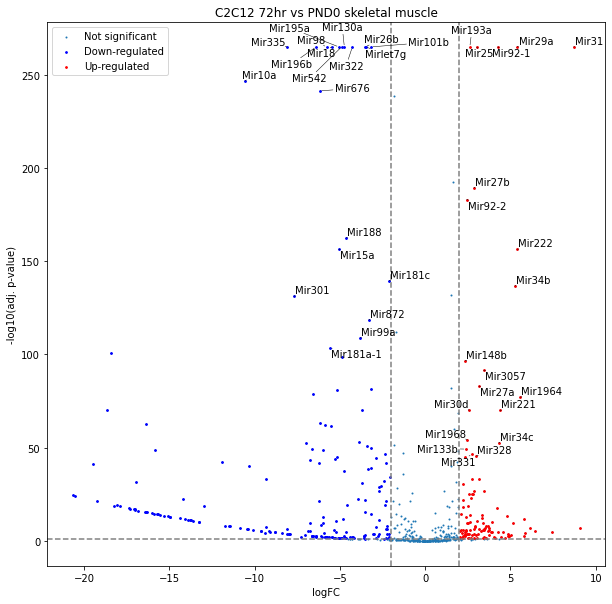

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scip

In [31]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

df['label'] = df.gene_name
df.label[df.DE == "No"] = ""

# Create the figure
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(10, 10)

# Plot whole df first (with small size dots)
ax.scatter(x=df['log2FoldChange'], y=df['nlog10padj'], s=1, label="Not significant")

# Highlight up- or down-regulated genes
down = df[df.DE == "Down"]
down.sort_values(["padj"], inplace=True)
up = df[df.DE == "Up"]
up.sort_values(["padj"], inplace=True)

# Overlay up- and down-regulated gene dfs with larger label and specific color
ax.scatter(x=down['log2FoldChange'], y=down['nlog10padj'], s=3, label="Down-regulated", color="blue")
ax.scatter(x=up['log2FoldChange'], y=up['nlog10padj'], s=3, label="Up-regulated", color="red")

# Display names of top 20 up- or down-regulated genes
n_genes = 20
texts = []
for i in range(min(n_genes, up.shape[0])):
    texts.append(ax.text(x=up.iloc[i, 1],
                         y=up.iloc[i, 8],
                         s=up.iloc[i, 7]))
for i in range(min(n_genes, down.shape[0])):
    texts.append(ax.text(x=down.iloc[i, 1],
                         y=down.iloc[i, 8],
                         s=down.iloc[i, 7]))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Draw lines indicating lfc and padj cutoffs
ax.set_xlabel("logFC")
ax.set_ylabel("-log10(adj. p-value)")
ax.axvline(l2fc_cutoff, color="grey", linestyle="--")
ax.axvline(-l2fc_cutoff, color="grey", linestyle="--")
ax.axhline(-np.log10(pval_cutoff), color="grey", linestyle="--")

# Draw legend
ax.legend()

# Add a title to the plot
ax.set_title("C2C12 72hr vs PND0 skeletal muscle")
#ax.set_title("Skeletal Muscle Embryonic vs PND0")

# Save the plot as a high-resolution PNG with specific width and height
output_file = "plots/volcano_MT.png"
#output_file = "plots/volcano_skeletal.png"
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()